<a href="https://colab.research.google.com/github/tfrendl/AnalyzeVocalFeatures/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Analyzing Vocal Features for Improved Machine Learning-Based Gender Identification </h1>
<p>
Brad Buckland<br>
Talia Frendl<br>
Triet Huynh<br>
</p>




<h2>Data Exploration</h2>

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

# download latest version of dataset
path = kagglehub.dataset_download("murtadhanajim/vocal-gender-features")

# locate file in folder
csv_file = os.path.join(path, "vocal_gender_features_new.csv")

df = pd.read_csv(csv_file)

# view number of null values
print("Total null values:", df.isnull().sum().sum())

# view total number of records in dataset
print("Total records:", df.shape[0])

# drop all rows with null values
df = df.dropna()

# view sample of data
df

100%|██████████| 3.57M/3.57M [00:01<00:00, 3.58MB/s]

Extracting files...


Total null values: 0
Total records: 16148


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,1879.614568,1092.394432,1802.821290,479.751352,19.930251,0.017547,3882.812500,0.116425,0.088527,1458.0010,...,12.486454,-4.034742,13.771613,-5.278946,14.380637,5.627317,9.196584,-7.411221,12.621205,1
16144,1810.603695,1124.628905,1829.785209,491.274993,19.115077,0.017356,3816.685268,0.110338,0.067830,1538.0670,...,12.727633,-2.590058,15.919325,-6.724170,14.858981,6.610045,8.266881,-6.264262,13.771297,1
16145,1820.216958,1197.520780,1770.716715,509.906085,19.506173,0.015819,3728.759766,0.105142,0.073135,1637.4955,...,12.606261,-0.207149,15.909226,-9.772965,18.003307,4.041325,9.128441,-3.483847,11.820591,1
16146,1636.619660,1055.832051,1747.968472,500.649272,19.118411,0.014007,3524.797712,0.094456,0.071088,1453.4177,...,11.453891,-2.735264,15.467333,-4.670631,12.668987,3.787537,8.726358,-7.397458,13.588392,1


<p>
At the time of the project, the dataset contains 16,148 records, each with 44 attributes. There are no null or obviously bad data. 43 of the attributes are float64 values, and 1 attribute (label) is an int64 value.
</p>

<p>
The attributes are as follows:

<ul>
<li><b>mean_spectral_centroid</b>: The spectrum's center of mass, indicating brightness</li>
<li><b>std_spectral_centroid</b>: Measures brightness variability</li>
<li><b>mean_spectral_bandwidth</b>: Indicates frequency spread</li>
<li><b>std_spectral_bandwidth</b>: Measures frequency spread variability</li>
<li><b>mean_spectral_contrast</b>: Measures tonal contrast by analyzing the average peak-valley differences in the spectrum</li>
<li><b>mean_spectral_flatness</b>: Measures signal noisiness</li>
<li><b>mean_spectral_rolloff</b>: Indicates sharpness</li>
<li><b>zero_crossing_rate</b>: Indicates noisiness or percussiveness</li>
<li><b>rms_energy</b>: Measures signal loudness</li>
<li><b>mean_pitch</b>: Measures average frequency</li>
<li><b>min_pitch</b>: Minimum pitch frequency</li>
<li><b>max_pitch</b>: Maximum pitch frequency</li>
<li><b>std_pitch</b>: Pitch variability</li>
<li><b>spectral_skew</b>: Indicates spectral distribution asymmetry</li>
<li><b>spectral_kurtosis</b>: Measures spectrum peakiness</li>
<li><b>energy_entropy</b>: Measures signal energy randomness</li>
<li><b>log_energy</b>: A compressed measure of signal energy</li>
<li><b>mfcc_1_mean to mfcc_13_mean</b>: Captures timbral (the unique quality or color of a sound that makes it unique) characteristics of the first 13 Mel Cepstral Coefficients</li>
<li><b>mfcc_1_std to mfcc_13_std</b>: Measures timbral variability(the unique quality or color of a sound that makes it unique) of the first 13 Mel Frequency Cepstral Coefficients </li>
<li><b>label</b>: male(1) or female(0)</li>
</p>

In [2]:
# view dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [3]:
# view summary of dataset
df.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


<h2>Bar Plot of Value Counts of Single Categorical Variable</h2>



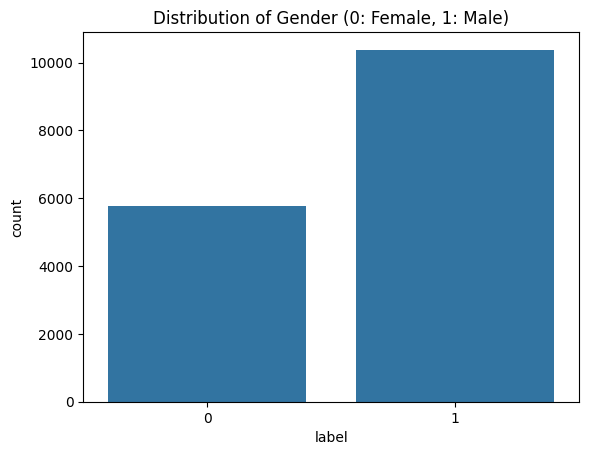

In [4]:
# Check class distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Gender (0: Female, 1: Male)')
plt.show()

<h2>Histogram of Single Numeric Variables</h2>

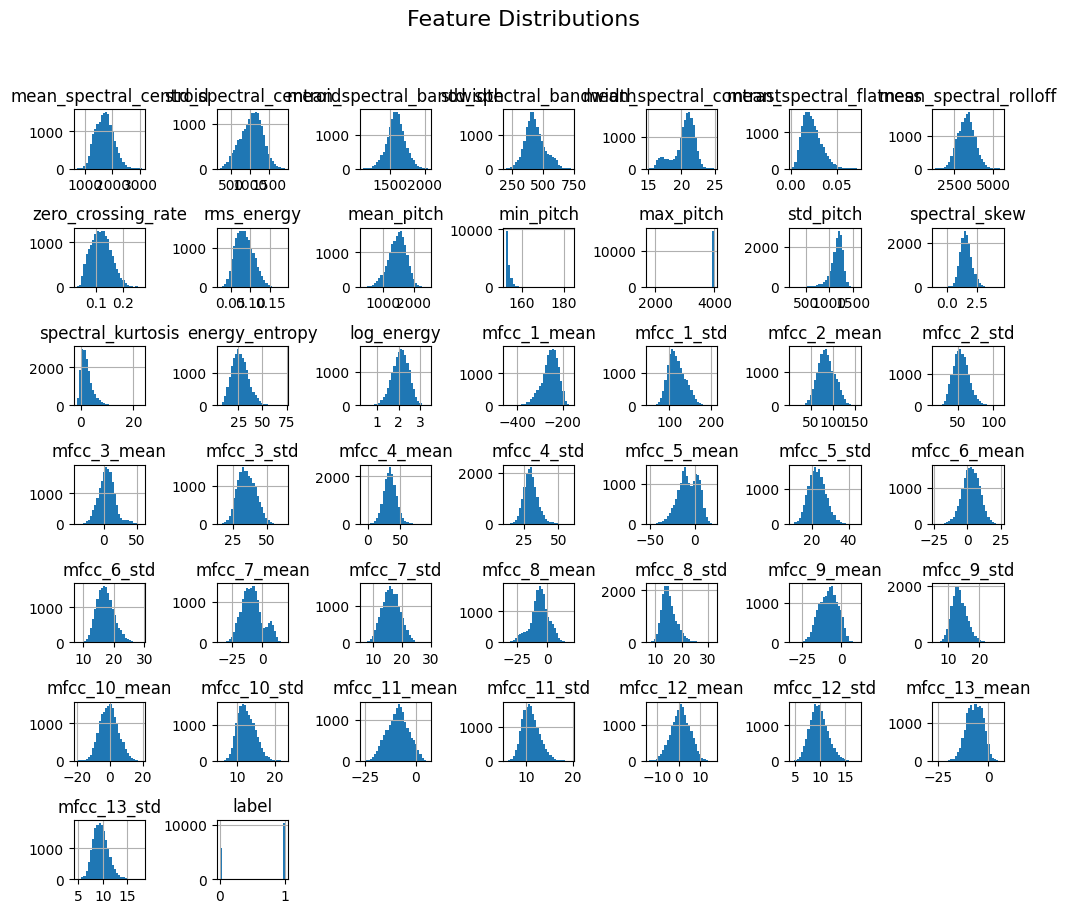

In [5]:
# Feature distribution
df.hist(figsize=(12, 10), bins=30)
plt.subplots_adjust(hspace=1, wspace=1)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<h2>Three-Variable Scatterplot</h2>

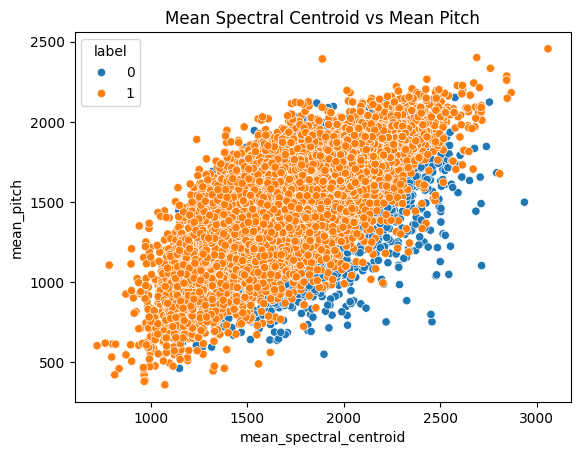

In [6]:
sns.scatterplot(x='mean_spectral_centroid', y='mean_pitch', hue='label', data=df)
plt.title('Mean Spectral Centroid vs Mean Pitch')
plt.show()

<h2>Violin Plot for Categorical/Numeric Variable Pair</h2>

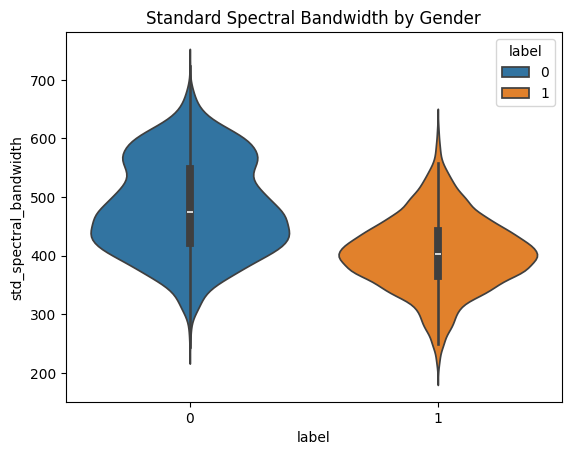

In [7]:
sns.violinplot(x='label', y='std_spectral_bandwidth', hue='label', data=df)
plt.title('Standard Spectral Bandwidth by Gender')
plt.show()

<h2>Optimizing k for k-Nearest Neighbors</h2>

Best k: 13


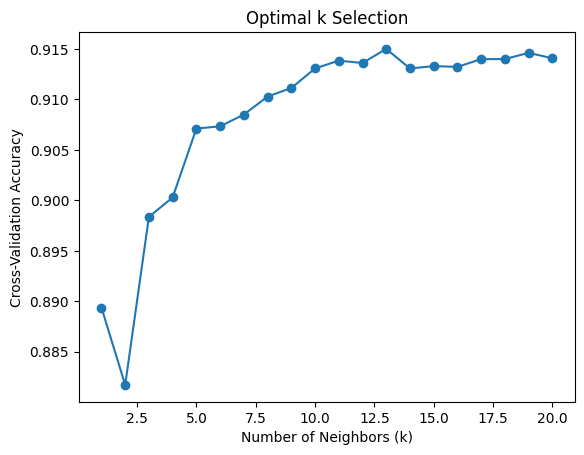

In [8]:
predictors = ['mean_spectral_centroid', 'mean_pitch', 'rms_energy','mfcc_5_mean', 'mean_spectral_contrast', 'std_spectral_bandwidth']
target = 'label'

X = df[predictors].values
y = df[target].values

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = range(1, 21)
scores = []

# Find the best k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5).mean()  # 5-fold cross-validation
    scores.append(score)

best_k = k_values[np.argmax(scores)]
print(f"Best k: {best_k}")

# Plot k vs. accuracy
plt.plot(k_values, scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Optimal k Selection")
plt.show()

<h3>Results</h3>
We can see that the optimal k is 13

<h2>Evaluate KNN Model Accuracy</h2>

In [9]:
# Use KNN to predict
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = (predictions == y_test).mean()

print(f"KNN Model test Accuracy (k=13): {accuracy:.4f}")

train_accuracy = knn.score(X_train, y_train)
print(f"KNN Model train Accuracy (k=13): {train_accuracy:.4f}")

KNN Model test Accuracy (k=13): 0.9121
KNN Model train Accuracy (k=13): 0.9272


<h3>Results</h3>
The K-Nearest Neighbors (KNN) model with k = 13 demonstrated a training accuracy of 92.72% and a test accuracy of 91.21%, indicating strong predictive performance. The relatively small difference between training and test accuracy suggests that the model generalizes well to unseen data with minimal overfitting.

<h2>Model Training for Linear Regression</h2>


In [10]:
# Linear Regression Model with All features selected
X = df.drop(columns=['label'])
y = df['label']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features (quadratic features)
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X_scaled)

# Get feature names for the polynomial features
poly_feature_names = poly.get_feature_names_out(X.columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=42)

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

<h2>Evaluate Linear Regression Performance</h2>

In [11]:
# Predictions
y_pred_continuous = linear_reg.predict(X_test)
y_pred = np.round(y_pred_continuous) # Make it 0s and 1s

# MSE, RMSE, and R-squared evaluation
mse = mean_squared_error(y_test, y_pred_continuous)
rmse = np.sqrt(mse)
accuracy = accuracy_score(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred_continuous)

# Cross-validation MSE
cv_scores = cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Confusion Matrix (For classification)
conf_matrix = confusion_matrix(y_test, y_pred)

# Feature importance (coefficients)
feature_importance = pd.DataFrame(linear_reg.coef_, poly_feature_names, columns=['Coefficient'])

# Results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"R-squared: {r2_score_value:.4f}")
print(f"Cross-validation MSE: {-cv_scores.mean():.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Feature Importance (Coefficients):")
print(feature_importance)

MSE: 0.0113
RMSE: 0.1061
Accuracy: 0.9998
R-squared: 0.9511
Cross-validation MSE: 0.0481
Confusion Matrix:
[[1738    0]
 [   1 3106]]
Feature Importance (Coefficients):
                           Coefficient
1                        -1.218119e-15
mean_spectral_centroid    3.086707e-02
std_spectral_centroid    -3.567871e-02
mean_spectral_bandwidth  -6.986262e-02
std_spectral_bandwidth   -5.163267e-02
...                                ...
mfcc_12_std mfcc_13_mean  3.252294e-04
mfcc_12_std mfcc_13_std  -2.301590e-03
mfcc_13_mean^2           -2.568834e-03
mfcc_13_mean mfcc_13_std  6.148553e-03
mfcc_13_std^2             3.112255e-04

[990 rows x 1 columns]


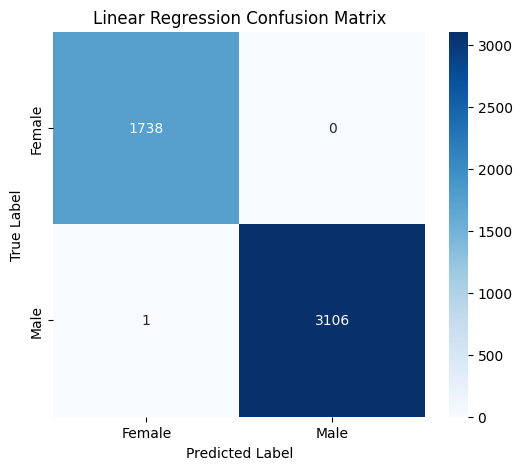

In [12]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Linear Regression Confusion Matrix")
plt.show()

<h3>Results</h3>
The Linear Regression model shows excellent performance with an extremely low Mean Squared Error (MSE) of 0.0113 and a Root Mean Squared Error (RMSE) of 0.1061, indicating minimal prediction errors. The accuracy of 99.98% demonstrates that the model is almost perfectly classifying male and female voices. The R-squared value of 0.9511 indicates that the model explains 95% of the variance in the data, which is a strong fit. The confusion matrix shows a near-perfect classification, with only one false negative (misclassifying a female voice as male) and no false positives. Cross-validation also shows a slightly higher MSE (0.0481), which suggests that the model might overfit the training data, but still performs well across multiple folds. The feature importance coefficients reveal that several features related to spectral centroid, bandwidth, and MFCCs (Mel-frequency cepstral coefficients) contribute significantly to the model’s predictions.

<h2>Feature Selection for Decision Tree Classification</h2>

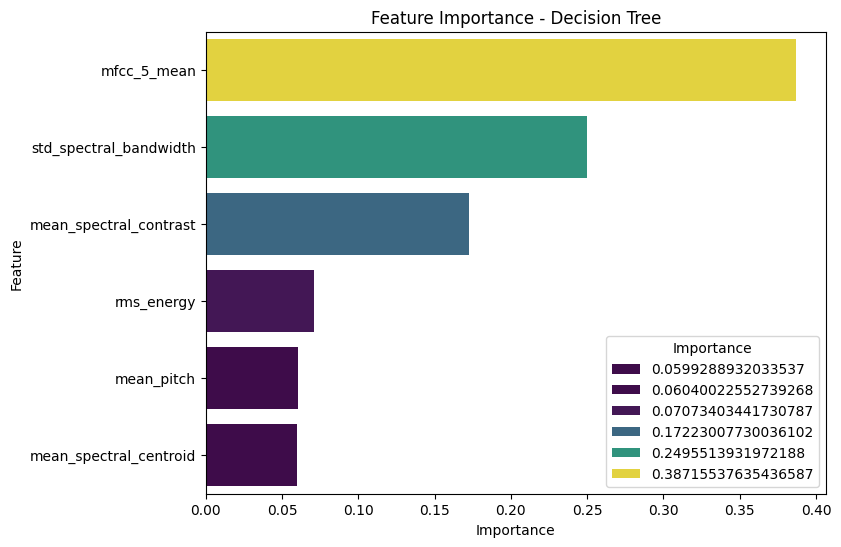

Selected Features: ['mfcc_5_mean', 'std_spectral_bandwidth', 'mean_spectral_contrast', 'rms_energy', 'mean_pitch']


In [13]:
X = df[predictors]  # Use all selected predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Get feature importance
feature_importances = pd.DataFrame({'Feature': predictors, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Importance', data=feature_importances, palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.show()

# Select Top Features (e.g., Top 5)
top_features = feature_importances.head(5)['Feature'].tolist()
print("Selected Features:", top_features)


<h2>Decision Tree Classifier: Training, Prediction, and Evaluation</h2>

In [14]:
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
dt_predictions = clf.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(classification_report(y_test, dt_predictions, target_names=["Female", "Male"]))

              precision    recall  f1-score   support

      Female       0.84      0.83      0.84      1163
        Male       0.91      0.91      0.91      2067

    accuracy                           0.88      3230
   macro avg       0.87      0.87      0.87      3230
weighted avg       0.88      0.88      0.88      3230



<h2>Decision Tree Learning Curve: Training vs. Test Data</h2>

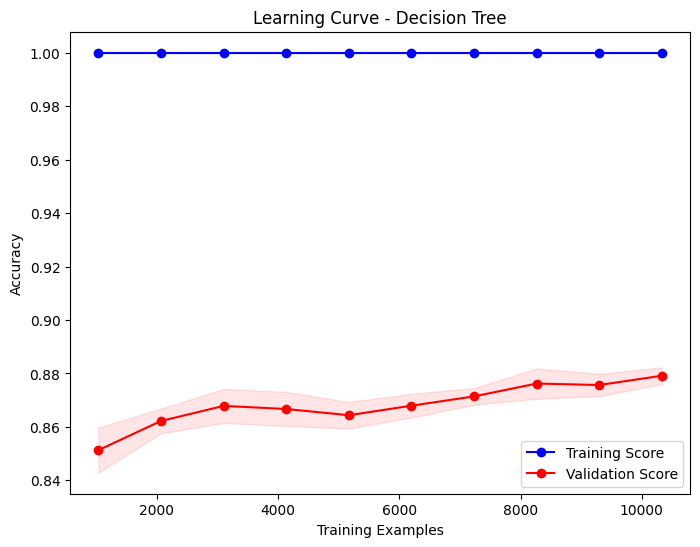

In [15]:
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")

# Fill between standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.show()

<h2>Confusion Matrix to Evaluate Decision Tree Performance</h2>

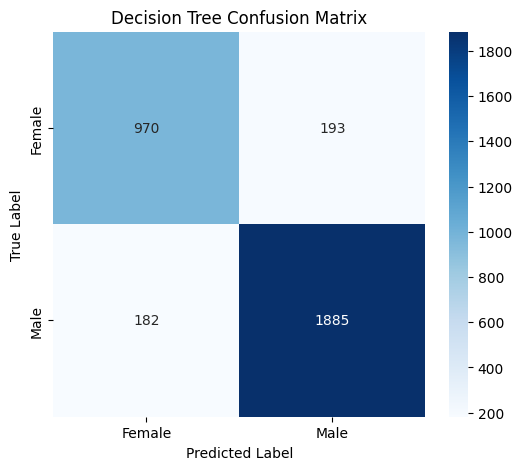

In [16]:
cm = confusion_matrix(y_test, dt_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

<h2>Grid Search to Tune Hyperparameters</h2>

In [17]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_tree = grid_search.best_estimator_

# Evaluate
dt_best_predictions = best_tree.predict(X_test)
dt_best_accuracy = accuracy_score(y_test, dt_best_predictions)
print(classification_report(y_test, dt_best_predictions, target_names=["Female", "Male"]))

              precision    recall  f1-score   support

      Female       0.86      0.84      0.85      1163
        Male       0.91      0.92      0.92      2067

    accuracy                           0.90      3230
   macro avg       0.89      0.88      0.89      3230
weighted avg       0.89      0.90      0.89      3230



<h2>Confusion Matrix to Evaluate Updated Decision Tree Performance</h2>

---



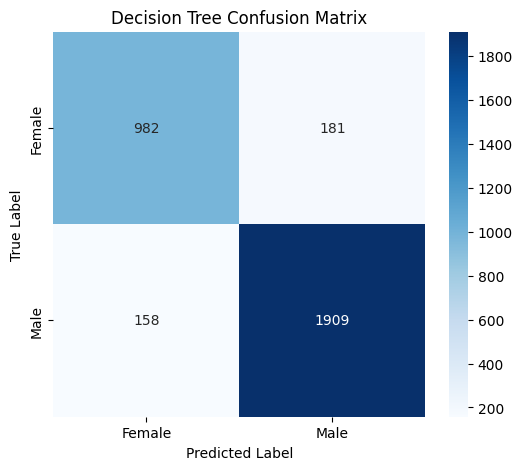

In [18]:
# Create confusion matrix
cm = confusion_matrix(y_test, dt_best_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

<h3>Results</h3>
The Decision Tree classifier demonstrates strong performance in predicting the gender of voices. The precision, recall, and F1-score for the "Female" class are 0.86, 0.84, and 0.85, respectively, while for the "Male" class, the precision, recall, and F1-score are higher at 0.91, 0.92, and 0.92, respectively. The overall accuracy of the model is 90%, reflecting a robust classification ability across both classes. The macro average precision, recall, and F1-score are 0.89, 0.88, and 0.89, indicating balanced performance, while the weighted averages (0.89 for precision, 0.90 for recall, and 0.89 for F1-score) further suggest that the model is well-calibrated, especially in predicting the "Male" class.

<h2>Conclusion</h2>
In summary, the Linear Regression model surpasses the other models in predictive accuracy, achieving an impressive accuracy of 99.98%, a low MSE of 0.0113, and an R-squared value of 0.9511. It nearly flawlessly classifies male and female voices with minimal errors, making it the most accurate model for this task. However, the model may exhibit some overfitting, as evidenced by the higher MSE in cross-validation. Despite this, it continues to perform well across multiple folds of validation.

The K-Nearest Neighbors (KNN) model with k = 13 also delivers strong results, reaching a test accuracy of 91.21% and showing minimal overfitting. While it does not quite match the Linear Regression model's nearly perfect accuracy, it still provides reliable and robust predictions for voice classification. The KNN model is more resistant to overfitting than Linear Regression, making it a valuable alternative.

The Decision Tree classifier shows satisfactory performance, with an overall accuracy of 90%. While it performs well in predicting male voices, it is less accurate in predicting female voices when compared to the other models. Despite this, the Decision Tree model remains useful, particularly in situations where model interpretability and simplicity are prioritized for real-time applications.